In [22]:
import pandas, numpy, copy


import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from src.utils import plot_truthtables, plot_growth_boxplot, plot_dilution_boxplot

import matplotlib
matplotlib.rcParams.update({'font.size': 7})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read in the large `RESULTS` table created in the previous notebook

In [2]:
results = pandas.read_csv('dat/RESULTS.csv')
results[:3]

,set,drug,method,dataset,quality,sensitivity,sensitivity_sem,specificity,specificity_sem,PPV,PPV_sem,RR,SR,UR,RS,SS,US,Total
0,basic,INH,UKMYC,bootstrapped50,ALL,91.240875,0.480167,95.395150,0.367757,95.206597,0.370676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,basic,INH,UKMYC,bootstrapped50,HIGH,93.746796,0.336085,96.624866,0.352979,96.618858,0.342746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,basic,INH,UKMYC,entire,ALL,91.200000,0.000000,95.600000,0.000000,95.397490,0.000000,456.0,33.0,11.0,22.0,448.0,30.0,1000.0


Now read in the list of drugs in the WHOv2 catalogue as well as the performance of the WHOv2 catalogue as reported in Annex 1 of the report

In [3]:
who_drugs = list(pandas.read_csv('dat/drugs/who2_drugs.csv').drug)

who = pandas.read_csv('dat/WHO2-Annex1-table.csv')
who = who[(who.catalogue=='WHO2') & (who.FRS==0.75)]

# reverse the order of the table so that the drugs are in the same order on all graphs
who = who.iloc[::-1]
who

,drug,catalogue,FRS,sensitivity,specificity,PPV,sensitivity_low,sensitivity_high,specificity_low,specificity_high,PPV_low,PPV_high
43,CAP,WHO2,0.75,66.2,97.8,80.1,64.1,68.2,97.6,98.1,78.1,81.9
40,KAN,WHO2,0.75,74.9,96.7,79.3,73.4,76.3,96.4,96.9,77.9,80.7
37,ETH,WHO2,0.75,74.8,85.9,63.9,73.6,76.0,85.3,86.4,62.7,65.1
34,STM,WHO2,0.75,79.7,94.1,89.9,78.9,80.5,93.7,94.4,89.3,90.5
31,AMI,WHO2,0.75,72.8,98.3,82.8,71.0,74.6,98.1,98.5,81.2,84.4
28,DLM,WHO2,0.75,14.7,99.9,72.5,10.6,19.7,99.8,99.9,58.3,84.1
25,CFZ,WHO2,0.75,17.0,98.7,38.1,14.2,20.0,98.5,98.9,32.6,43.8
22,LEV,WHO2,0.75,84.8,96.9,88.1,83.9,85.7,96.7,97.1,87.3,89.0
19,MXF,WHO2,0.75,85.7,93.5,74.0,84.6,86.8,93.2,93.9,72.7,75.2
16,LZD,WHO2,0.75,34.0,99.8,78.4,29.2,39.0,99.7,99.9,71.3,84.5


In [4]:
df = results[(results.dataset=='bootstrapped50') & (results.quality=='ALL')]

# reverse the order of the table so the drugs are in the correct order from top to bottom in the plot
df = df.iloc[::-1]
df[:15]

,set,drug,method,dataset,quality,sensitivity,sensitivity_sem,specificity,specificity_sem,PPV,PPV_sem,RR,SR,UR,RS,SS,US,Total
154,nulls+minors,CAP,MGIT,bootstrapped50,ALL,74.983621,0.941786,98.295397,0.200364,94.980289,0.593964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,nulls+minors,KAN,UKMYC,bootstrapped50,ALL,76.749387,1.047989,98.699913,0.182592,96.031846,0.551728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,nulls+minors,ETH,UKMYC,bootstrapped50,ALL,72.242845,1.038901,87.015960,0.512836,69.356946,0.993347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,nulls+minors,STM,MGIT,bootstrapped50,ALL,80.735208,0.769336,95.267691,0.366638,92.251254,0.571979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,nulls+minors,AMI,UKMYC,bootstrapped50,ALL,74.267310,1.010874,99.400998,0.107511,98.067741,0.344641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,nulls+minors,DLM,UKMYC,bootstrapped50,ALL,12.298169,1.115095,99.888390,0.049223,95.484431,1.849704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,nulls+minors,CFZ,UKMYC,bootstrapped50,ALL,8.079825,0.598057,98.008384,0.210772,62.361750,3.068161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,nulls+minors,LEV,UKMYC,bootstrapped50,ALL,82.316749,0.749602,96.431502,0.287389,91.743096,0.691066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,nulls+minors,MXF,UKMYC,bootstrapped50,ALL,85.765151,0.780545,93.824019,0.356465,84.916448,0.897091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,nulls+minors,LZD,UKMYC,bootstrapped50,ALL,28.114421,1.933896,99.770307,0.074055,94.310212,1.857370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now also produce a table for the UKMYC drugs with HIGH confidence MIC measurements. Because four drugs will not have values we have to manually insert the rows to ensure the graphs work.


In [5]:
df2 = results[(results.dataset=='bootstrapped50') & (results.quality=='HIGH') & (results.set=='nulls+minors')]

rows = []
for i in ['PZA', 'BDQ', 'STM', 'CAP']:
    row = ['nulls+minor', i, 'UKMYC', 'bootstrapped50', 'HIGH'] + [None for i in range(13)]
    rows.append(row)

df3 = pandas.DataFrame(rows, columns=df2.columns)
df2 = pandas.concat([df2, df3])

df2.drug = df2.drug.astype('category')
df2.drug = df2.drug.cat.set_categories(who_drugs)
df2.sort_values('drug', inplace=True)
df2 = df2.iloc[::-1]
df2

/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3359408380.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pandas.concat([df2, df3])


,set,drug,method,dataset,quality,sensitivity,sensitivity_sem,specificity,specificity_sem,PPV,PPV_sem,RR,SR,UR,RS,SS,US,Total
3,nulls+minor,CAP,UKMYC,bootstrapped50,HIGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,nulls+minors,KAN,UKMYC,bootstrapped50,HIGH,84.298262,0.713334,98.322163,0.199675,95.369505,0.574964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,nulls+minors,ETH,UKMYC,bootstrapped50,HIGH,75.425695,0.999098,86.010415,0.532746,69.546410,1.094366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nulls+minor,STM,UKMYC,bootstrapped50,HIGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,nulls+minors,AMI,UKMYC,bootstrapped50,HIGH,83.340398,0.765663,99.293077,0.103791,98.014958,0.316433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,nulls+minors,DLM,UKMYC,bootstrapped50,HIGH,21.673766,1.971608,100.000000,0.000000,100.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,nulls+minors,CFZ,UKMYC,bootstrapped50,HIGH,4.894349,0.743395,97.639388,0.217028,21.421913,3.400427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,nulls+minors,LEV,UKMYC,bootstrapped50,HIGH,87.264057,0.674621,96.563175,0.266662,92.600837,0.541725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,nulls+minors,MXF,UKMYC,bootstrapped50,HIGH,90.003945,0.548099,93.280991,0.376534,86.225812,0.761897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,nulls+minors,LZD,UKMYC,bootstrapped50,HIGH,42.467444,1.895582,99.816012,0.049593,95.592543,1.267028,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
colours = {'sensitivity': ['#990000', '#d7301f', '#ef6548'], 'specificity': ['#034e7b', '#0570b0','#3690c0'], 'PPV': ['#005a32', '#238443','#41ab5d']}


for metric in ['sensitivity', 'specificity','PPV']:
    fig = plt.figure(figsize=(2.8, 8.5))
    axes = plt.gca()
    axes.spines["top"].set_visible(False)
    axes.spines["right"].set_visible(False)
    axes.spines["bottom"].set_visible(False)
    axes.get_xaxis().set_visible(False)
    axes.plot([100,100], [-0.5, 14.5], color='#cccccc', linewidth=0.5, linestyle='-')
    y=numpy.arange(len(df[results.set=='basic']))
    axes.set_yticks(y, df[results.set=='basic']['drug'])
    e = (
        who[metric + "_high"] - who[metric],
        who[metric] - who[metric + "_low"],
    )
    axes.barh(y+0.3, who[metric], 0.2, label=who[metric], color='#cccccc', edgecolor='white', linewidth=1, alpha=0.5)
    subset = who[[metric]]
    subset.columns = ['x']
    y=0
    for idx,row in subset.iterrows():
        axes.text(row.x+2, y+0.3, "%.1f" % row.x, ha="left", va='center', color='#cccccc', fontweight='light')
        y+=1

    subset = df[results.set=='basic'][[metric, metric+'_sem']]
    subset.columns = ['x', 'e']
    y=0
    for idx,row in subset.iterrows():
        axes.plot([row.x, row.x], [y, y+0.2], color=colours[metric][0], linewidth=1)
        axes.add_patch(Rectangle((row.x-row.e, y), 2*row.e, 0.2, fc=colours[metric][0], alpha=0.2))
        axes.text(row.x+2, y+0.1, "%.1f" % row.x, ha="left", va='center', color=colours[metric][0], fontweight='heavy') #, backgroundcolor='white')
        y+=1

    subset = df[results.set=='nulls+minors'][[metric, metric+'_sem']]    
    subset.columns = ['x', 'e']
    y=0
    for idx,row in subset.iterrows():
        axes.plot([row.x, row.x], [y-0.2, y], color=colours[metric][1], linewidth=1)
        axes.add_patch(Rectangle((row.x-row.e, y-0.2), 2*row.e, 0.2, fc=colours[metric][1], alpha=0.2))
        axes.text(row.x+2, y-0.1, "%.1f" % row.x, ha="left", va='center', color=colours[metric][1], fontweight='bold')
        y+=1

    subset = df2[[metric, metric+'_sem']]
    subset.columns = ['x', 'e']
    y=0
    for idx,row in subset.iterrows():
        axes.plot([row.x, row.x], [y-0.4, y-0.2], color=colours[metric][2], linewidth=1)
        axes.add_patch(Rectangle((row.x-row.e, y-0.4), 2*row.e, 0.2, fc=colours[metric][2], alpha=0.2))
        axes.text(row.x+2, y-0.3, "%.1f" % row.x, ha="left", va='center', color=colours[metric][2], fontweight='bold')
        y+=1

    axes.set_ylim(-0.3, 14.5)

    
    fig.savefig('pdf/fig-results-main-'+metric+'.pdf', bbox_inches='tight')
    plt.close()

/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3341333803.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y=numpy.arange(len(df[results.set=='basic']))
/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3341333803.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes.set_yticks(y, df[results.set=='basic']['drug'])
/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3341333803.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[results.set=='basic'][[metric, metric+'_sem']]
/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3341333803.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[results.set=='nulls+minors'][[metric, metric+'_sem']]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy shou

In [7]:
results

,set,drug,method,dataset,quality,sensitivity,sensitivity_sem,specificity,specificity_sem,PPV,PPV_sem,RR,SR,UR,RS,SS,US,Total
0,basic,INH,UKMYC,bootstrapped50,ALL,91.240875,0.480167,95.395150,0.367757,95.206597,0.370676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,basic,INH,UKMYC,bootstrapped50,HIGH,93.746796,0.336085,96.624866,0.352979,96.618858,0.342746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,basic,INH,UKMYC,entire,ALL,91.200000,0.000000,95.600000,0.000000,95.397490,0.000000,456.0,33.0,11.0,22.0,448.0,30.0,1000.0
3,basic,INH,UKMYC,entire,HIGH,93.913043,0.000000,96.412556,0.000000,96.428571,0.000000,432.0,23.0,5.0,16.0,404.0,26.0,906.0
4,basic,RIF,UKMYC,bootstrapped50,ALL,93.729501,0.406094,95.957331,0.314197,95.445435,0.375315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,nulls+minors,KAN,UKMYC,bootstrapped50,HIGH,84.298262,0.713334,98.322163,0.199675,95.369505,0.574964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,nulls+minors,KAN,UKMYC,entire,ALL,76.470588,0.000000,98.730606,0.000000,96.086957,0.000000,221.0,56.0,12.0,9.0,650.0,50.0,1000.0
153,nulls+minors,KAN,UKMYC,entire,HIGH,84.615385,0.000000,98.543689,0.000000,96.069869,0.000000,220.0,34.0,6.0,9.0,563.0,46.0,880.0
154,nulls+minors,CAP,MGIT,bootstrapped50,ALL,74.983621,0.941786,98.295397,0.200364,94.980289,0.593964,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for set in ['basic', 'nulls', 'nulls+minors']:

    df = results[(results.set==set)]

    plot_truthtables(df, ['ALL','HIGH'], f'table-{set}-')


In [9]:
UKMYC_PHENOTYPES = pandas.read_csv('dat/UKMYC_1000_phenotypes.csv')
UKMYC_PHENOTYPES.set_index('ENA_RUN_ACCESSION', inplace=True)

UKMYC_SAMPLES = pandas.read_csv('dat/UKMYC_1000_samples.csv')
UKMYC_SAMPLES.set_index('ENA_RUN_ACCESSION', inplace=True)

UKMYC_PHENOTYPES = UKMYC_PHENOTYPES.join(UKMYC_SAMPLES[['POS_AVG_GROWTH']])
UKMYC_PHENOTYPES.reset_index(inplace=True)
UKMYC_PHENOTYPES.set_index(['ENA_RUN_ACCESSION', 'DRUG'], inplace=True)
UKMYC_PHENOTYPES[:3]

UNIQUEID BINARY_PHENOTYPE  \
ENA_RUN_ACCESSION DRUG                                                        
ERR4810791        INH   site.02.subj.0068.lab.22A018.iso.1                R   
                  RIF   site.02.subj.0068.lab.22A018.iso.1                R   
                  EMB   site.02.subj.0068.lab.22A018.iso.1                R   

                       PHENOTYPE_QUALITY PHENOTYPE_METHOD PLATEDESIGN   MIC  \
ENA_RUN_ACCESSION DRUG                                                        
ERR4810791        INH               HIGH            UKMYC      UKMYC5  >1.6   
                  RIF               HIGH            UKMYC      UKMYC5    >4   
                  EMB               HIGH            UKMYC      UKMYC5    >8   

                        DILUTION  POS_AVG_GROWTH  
ENA_RUN_ACCESSION DRUG                            
ERR4810791        INH          8           44.68  
                  RIF          8           44.68  
                  EMB          9           44.68

In [10]:
PREDICTIONS = pandas.read_csv('dat/PREDICTIONS.csv')
PREDICTIONS.set_index(['ENA_RUN_ACCESSION', 'DRUG'], inplace=True)
PREDICTIONS[:3]

SET PREDICTION
ENA_RUN_ACCESSION DRUG                  
ERR13286038       INH   basic          R
                  RIF   basic          R
                  PZA   basic          R

In [11]:
UKMYC_RESULTS = UKMYC_PHENOTYPES.join(PREDICTIONS)
UKMYC_RESULTS.reset_index(inplace=True)
# UKMYC_RESULTS.set_index(['SET', 'ENA_RUN_ACCESSION', 'DRUG'], inplace=True)
UKMYC_RESULTS[:3]

,ENA_RUN_ACCESSION,DRUG,UNIQUEID,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,PHENOTYPE_METHOD,PLATEDESIGN,MIC,DILUTION,POS_AVG_GROWTH,SET,PREDICTION
0,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,basic,R
1,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls,R
2,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls+minors,R


In [12]:
def define_outcome(row):
    if row.PREDICTION in ['S', 'U']:
        if row.BINARY_PHENOTYPE == 'R':
            return '(S+U)R'
        else:
            return '(S+U)S'
    else:
        return row.PREDICTION+row.BINARY_PHENOTYPE

UKMYC_RESULTS['OUTCOME'] = UKMYC_RESULTS.apply(define_outcome, axis=1)
UKMYC_RESULTS.OUTCOME.value_counts()

OUTCOME
(S+U)S    24867
RR         7073
(S+U)R     2975
RS         1065
FS           18
FR            2
Name: count, dtype: int64

In [13]:
df = UKMYC_RESULTS[(UKMYC_RESULTS.PHENOTYPE_METHOD=='UKMYC') & (UKMYC_RESULTS.OUTCOME.str[0]!='F')]
df

,ENA_RUN_ACCESSION,DRUG,UNIQUEID,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,PHENOTYPE_METHOD,PLATEDESIGN,MIC,DILUTION,POS_AVG_GROWTH,SET,PREDICTION,OUTCOME
0,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,basic,R,RR
1,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls,R,RR
2,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls+minors,R,RR
3,ERR4810791,RIF,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>4,8,44.68,basic,R,RR
4,ERR4810791,RIF,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>4,8,44.68,nulls,R,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,ERR4812280,ETH,site.05.subj.CA-0634.lab.CO-12310-18.iso.1,S,HIGH,UKMYC,UKMYC6,0.5,2,22.62,nulls,U,(S+U)S
35996,ERR4812280,ETH,site.05.subj.CA-0634.lab.CO-12310-18.iso.1,S,HIGH,UKMYC,UKMYC6,0.5,2,22.62,nulls+minors,U,(S+U)S
35997,ERR4812280,KAN,site.05.subj.CA-0634.lab.CO-12310-18.iso.1,S,HIGH,UKMYC,UKMYC6,<=1,1,22.62,basic,S,(S+U)S
35998,ERR4812280,KAN,site.05.subj.CA-0634.lab.CO-12310-18.iso.1,S,HIGH,UKMYC,UKMYC6,<=1,1,22.62,nulls,S,(S+U)S


In [14]:
for set in ['basic', 'nulls', 'nulls+minors']:
    for drug in df.DRUG.unique():
        for quality in ['HIGH','ALL']:
            if quality=='HIGH':
                foo = copy.deepcopy(df[(df.SET==set) & (df.DRUG==drug) & (df.PHENOTYPE_QUALITY==quality)])
            else:

                foo = copy.deepcopy(df[(df.SET==set) & (df.DRUG==drug)])
            plot_growth_boxplot(foo, f'{set}-{drug}-{quality}')

In [15]:
df[:3]

,ENA_RUN_ACCESSION,DRUG,UNIQUEID,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,PHENOTYPE_METHOD,PLATEDESIGN,MIC,DILUTION,POS_AVG_GROWTH,SET,PREDICTION,OUTCOME
0,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,basic,R,RR
1,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls,R,RR
2,ERR4810791,INH,site.02.subj.0068.lab.22A018.iso.1,R,HIGH,UKMYC,UKMYC5,>1.6,8,44.68,nulls+minors,R,RR


In [37]:
def add_jitter(row, maximum=0.2):
    random_float = (numpy.random.normal()) - 0.5
    return row["DILUTION"] + (maximum * random_float)


df["DILUTION_JITTERED"] = df.apply(add_jitter, axis=1)

/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_81182/3174199073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DILUTION_JITTERED"] = df.apply(add_jitter, axis=1)


AttributeError: PathCollection.set() got an unexpected keyword argument 'order'

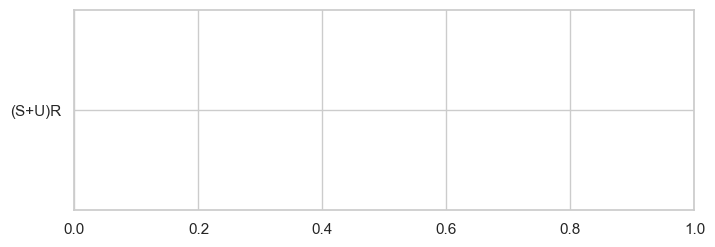

In [68]:
for set in ['basic', 'nulls', 'nulls+minors']:
    for drug in df.DRUG.unique():
        for quality in ['HIGH','ALL']:
            if quality=='HIGH':
                foo = copy.deepcopy(df[(df.SET==set) & (df.DRUG==drug) & (df.PHENOTYPE_QUALITY==quality)])
            else:

                foo = copy.deepcopy(df[(df.SET==set) & (df.DRUG==drug)])
            baa = foo[['DILUTION','OUTCOME','ENA_RUN_ACCESSION']].groupby(['OUTCOME','DILUTION']).count()
            baa.columns = ['NUMBER']
            baa.reset_index(inplace=True)
            plot_dilution_boxplot(baa, f'{set}-{drug}-{quality}')

In [36]:
plot_dilution_boxplot(foo, f'{set}-{drug}-{quality}')

plotting


In [51]:
baa = foo[['DILUTION','OUTCOME','ENA_RUN_ACCESSION']].groupby(['OUTCOME','DILUTION']).count()
baa


ENA_RUN_ACCESSION
OUTCOME DILUTION                   
(S+U)R  4                        40
        5                        10
        6                        18
(S+U)S  1                       196
        2                       357
        3                       147
RR      4                         4
        5                         8
        6                       209
RS      1                         2
        2                         5
        3                         2

In [54]:

baa.columns = ['NUMBER']
baa.reset_index(inplace=True)

In [65]:
plot_dilution_boxplot(baa,'baa')

In [58]:
baa

,OUTCOME,DILUTION,NUMBER
0,(S+U)R,4,40
1,(S+U)R,5,10
2,(S+U)R,6,18
3,(S+U)S,1,196
4,(S+U)S,2,357
5,(S+U)S,3,147
6,RR,4,4
7,RR,5,8
8,RR,6,209
9,RS,1,2
